In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:

l = [1,2,3,4,5,6,7]
l2  = [1,23,45,56,23,2,2]
#usage of data_range
date_range = pd.date_range(start ='2022-12-01', end ='2022-12-07', freq='D')
df =  pd.DataFrame(data = {'Sales':l ,'Values':l2}, index=date_range)
print(type(df.index))



<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [3]:
with open('product_df.pkl', 'rb') as f:
    product_df = pickle.load(f)

In [4]:
product_df =  pd.Series(product_df['Sales'])

<class 'tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset'>
<class 'tensorflow.python.data.ops.window_op._WindowDataset'>
<class 'tensorflow.python.data.ops.flat_map_op._FlatMapDataset'>
[  40 3375 3633 1926  801  440]
<class 'tensorflow.python.framework.ops.EagerTensor'>

[3375 3633 1926  801  440  134]
<class 'tensorflow.python.framework.ops.EagerTensor'>

[3633 1926  801  440  134   52]
<class 'tensorflow.python.framework.ops.EagerTensor'>

[1926  801  440  134   52  151]
<class 'tensorflow.python.framework.ops.EagerTensor'>

[801 440 134  52 151 468]
<class 'tensorflow.python.framework.ops.EagerTensor'>

[ 440  134   52  151  468 3763]
<class 'tensorflow.python.framework.ops.EagerTensor'>

[ 134   52  151  468 3763 2894]
<class 'tensorflow.python.framework.ops.EagerTensor'>

[  52  151  468 3763 2894 6574]
<class 'tensorflow.python.framework.ops.EagerTensor'>

[ 151  468 3763 2894 6574 4858]
<class 'tensorflow.python.framework.ops.EagerTensor'>

[ 468 3763 2894 6

2024-05-25 16:46:15.488531: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


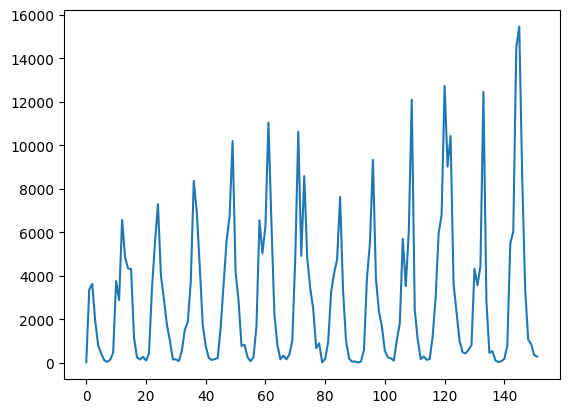

In [5]:

plt.plot(product_df.values)
series = product_df.values
#1 from numpy array to  a tensor slice dataset
dataset = tf.data.Dataset.from_tensor_slices(series)
print(type(dataset))
#2 from  tensor slice to  dataset of windowed datasets
dataset=dataset.window(6,shift=1, drop_remainder=True)

print(type(dataset))
dataset = dataset.flat_map(lambda window: window.batch(6))
print(type(dataset))

for value in dataset:
    print(value.numpy())
    print(type(value))
    print()




In [6]:
dataset = dataset.map(lambda window: (window[:-1],window[-1]))
for x, y in dataset:
    print(x.numpy(),y.numpy())

[  40 3375 3633 1926  801] 440
[3375 3633 1926  801  440] 134
[3633 1926  801  440  134] 52
[1926  801  440  134   52] 151
[801 440 134  52 151] 468
[440 134  52 151 468] 3763
[ 134   52  151  468 3763] 2894
[  52  151  468 3763 2894] 6574
[ 151  468 3763 2894 6574] 4858
[ 468 3763 2894 6574 4858] 4341
[3763 2894 6574 4858 4341] 4315
[2894 6574 4858 4341 4315] 1151
[6574 4858 4341 4315 1151] 256
[4858 4341 4315 1151  256] 165
[4341 4315 1151  256  165] 284
[4315 1151  256  165  284] 116
[1151  256  165  284  116] 434
[256 165 284 116 434] 3417
[ 165  284  116  434 3417] 5518
[ 284  116  434 3417 5518] 7293
[ 116  434 3417 5518 7293] 4021
[ 434 3417 5518 7293 4021] 2940
[3417 5518 7293 4021 2940] 1766
[5518 7293 4021 2940 1766] 1023
[7293 4021 2940 1766 1023] 166
[4021 2940 1766 1023  166] 171
[2940 1766 1023  166  171] 88
[1766 1023  166  171   88] 551
[1023  166  171   88  551] 1531
[ 166  171   88  551 1531] 1893
[ 171   88  551 1531 1893] 3743
[  88  551 1531 1893 3743] 8362
[ 551 1

2024-05-25 16:46:15.873142: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [7]:
dataset =  dataset.shuffle(buffer_size=120)
for x, y in dataset:
    print(x.numpy(),y.numpy())


[ 6024 12094  2449  1069   182] 306
[ 1703  6551  5036  6294 11044] 6467
[3261 4125 4762 7630 3304] 1008
[2894 6574 4858 4341 4315] 1151
[ 468 3763 2894 6574 4858] 4341
[6951 4444 1762  784  239] 142
[3885 2377 1665  568  260] 218
[1766 1023  166  171   88] 551
[3640 2332 1028  501  442] 603
[4444 1762  784  239  142] 179
[ 1021  4889 10620  4918  8587] 4811
[ 61  74  26  70 610] 3898
[ 165  284  116  434 3417] 5518
[3375 3633 1926  801  440] 134
[3743 8362 6951 4444 1762] 784
[801 440 134  52 151] 468
[3763 2894 6574 4858 4341] 4315
[256 165 284 116 434] 3417
[3441 2480  683  899   31] 190
[1151  256  165  284  116] 434
[ 3019  5958  6809 12728  9020] 10432
[9329 3885 2377 1665  568] 260
[12455  2830   462   552   125] 42
[  384  1021  4889 10620  4918] 8587
[2850  782  836  275   83] 264
[ 5700  3532  6024 12094  2449] 1069
[ 171   88  551 1531 1893] 3743
[2332 1028  501  442  603] 825
[  42   87  190  798 5486] 6048
[784 239 142 179 226] 1621
[12094  2449  1069   182   306] 150
[  1

2024-05-25 16:46:15.930485: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [8]:
dataset= dataset.batch(6).prefetch(1)
for x,y in dataset:
    print("x="  , x.numpy())
    print("y=" ,y.numpy())

x= [[ 4858  4341  4315  1151   256]
 [12094  2449  1069   182   306]
 [  264  1703  6551  5036  6294]
 [ 4125  4762  7630  3304  1008]
 [ 4021  2940  1766  1023   166]
 [ 4315  1151   256   165   284]]
y= [  165   150 11044   209   171   116]
x= [[ 6809 12728  9020 10432  3640]
 [ 8587  4811  3441  2480   683]
 [ 6024 12094  2449  1069   182]
 [ 4341  4315  1151   256   165]
 [  953  3261  4125  4762  7630]
 [ 6294 11044  6467  2241   834]]
y= [2332  899  306  284 3304  172]
x= [[ 1703  6551  5036  6294 11044]
 [  226  1621  3656  5636  6737]
 [ 1893  3743  8362  6951  4444]
 [  111  1057  1831  5700  3532]
 [ 6467  2241   834   172   343]
 [ 3019  5958  6809 12728  9020]]
y= [ 6467 10197  1762  6024   172 10432]
x= [[ 3885  2377  1665   568   260]
 [ 2241   834   172   343   172]
 [   87   190   798  5486  6048]
 [ 1831  5700  3532  6024 12094]
 [ 1926   801   440   134    52]
 [  275    83   264  1703  6551]]
y= [  218   384 14477  2449   151  5036]
x= [[ 1057  1831  5700  3532  6024

2024-05-25 16:46:16.022292: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [9]:
# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape=[5])
])
# Compile the model
model.compile(loss='mse', optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9))



/Users/parvizpirizade/Documents/stock_price_prediction/time_series_analysis/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
 # Repeat the dataset indefinitely
# Train the model
history = model.fit(dataset, epochs=25, verbose=0)






2024-05-25 16:46:16.414319: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/opt/homebrew/Cellar/python@3.12/3.12.2_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)
2024-05-25 16:46:16.450249: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-25 16:46:16.482865: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-25 16:46:16.514150: W tensorflow/core/framework/local_rendezvo